In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

In [2]:
lats = np.random.uniform(-90,90,size = 1500)
lngs = np.random.uniform(-180,180,size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs
coordinates = list(lat_lngs)

In [3]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

50.954532748597614 -98.55712205026408
-2.8109009393580067 -177.91172192373824
-27.927826365112622 -152.47901823403845
32.78790858200392 93.37907922352775
45.84838061147511 -48.720740145186284
21.68610680135754 33.30790762510256
3.3009062607142425 32.01015799689591
0.2441540811673093 87.21600845940418
1.4214074077962806 44.272719967326594
42.64234078790355 -135.9118045672492
-19.319521996300267 82.18490078787636
-18.69174130132278 -158.595341540676
5.554157035481239 22.595757658053373
-8.778613355030302 93.76589658824969
50.49946428064979 -120.61827201450475
-33.49667896427886 -143.54905865704288
-29.001045591891646 -43.1825556839768
51.311210742301824 -40.44033179599111
-18.96639722205188 -33.33671416357407
74.66475792412893 92.55520380869734
-76.5547705924684 -25.13359344069437
48.88790247556048 -99.3856593185967
53.87447220138256 -48.2446888240807
-28.08989758513838 -17.834535490269218
71.38786634090843 12.402546594936496
-52.43354394255795 117.33400819538167
-23.059398831843794 20.4

-86.78828443706826 -97.43219659293058
33.10097767690101 14.711482551004849
-38.22177085539415 -162.16135710865285
-25.496399047984795 173.0892758558963
44.07981525831781 89.47169817737222
45.716069372455706 -54.09834380381463
59.732615234048865 -163.23046456648868
28.57399710197774 -155.23795700839966
76.26461211377509 -166.91723045854047
56.27634053194075 55.60269503017841
61.58230265134861 42.97842552594474
76.38247369761598 158.19779589022562
-85.0739840125142 -81.9884503975588
49.62357321590568 101.70662350064651
-63.219925499905585 -65.1752456995053
-30.73017350364529 159.27943767723235
62.62219668504872 10.015656299795296
82.77179985388312 128.84459671379807
16.743975773698978 -83.75806689216712
-59.24157023721496 -98.73576889670194
-37.167659105608834 -67.36156569948754
28.862071390816396 169.78823699844418
-33.15723733318252 138.77472853602723
-59.65815867602862 128.17648662295494
-64.42544272762117 87.19181295196427
-67.56154537974469 60.87063136557771
55.036756449709 -161.579

In [4]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)        

606

In [5]:
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d39686a781a93b95e99fac1569f508a


In [6]:
import time
from datetime import datetime


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")
# Create counters.
record_count = 1
set_count = 1
for i,city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i%50==0 and i>=50):
        set_count+=1
        record_count = 1
        time.sleep(10)
        
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record{record_count} of Set{set_count} | {city}")
    # Add 1 to the record count.
    record_count+=1
# Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({
            "City":city.title(),
            "Lat":city_lat,
            "Lng": city_lng,                 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date                 
        })
    except:
        print("City not found.Skipping....")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


    
                                          
                                          

Beginning Data Retrieval   
---------------------------
Processing Record1 of Set1 | neepawa
Processing Record2 of Set1 | vaitupu
City not found.Skipping....
Processing Record3 of Set1 | mataura
Processing Record4 of Set1 | lasa
Processing Record5 of Set1 | torbay
Processing Record6 of Set1 | aswan
Processing Record7 of Set1 | adjumani
Processing Record8 of Set1 | hambantota
Processing Record9 of Set1 | barawe
City not found.Skipping....
Processing Record10 of Set1 | port hardy
Processing Record11 of Set1 | hithadhoo
Processing Record12 of Set1 | avarua
Processing Record13 of Set1 | bangassou
Processing Record14 of Set1 | bengkulu
Processing Record15 of Set1 | logan lake
Processing Record16 of Set1 | imbituba
Processing Record17 of Set1 | nanortalik
Processing Record18 of Set1 | caravelas
Processing Record19 of Set1 | talnakh
Processing Record20 of Set1 | ushuaia
Processing Record21 of Set1 | killarney
Processing Record22 of Set1 | jamestown
Processing Record23 of Set1 | gravdal
Proces

Processing Record49 of Set4 | diego de almagro
Processing Record50 of Set4 | solsvik
City not found.Skipping....
Processing Record1 of Set5 | shelbyville
Processing Record2 of Set5 | sao felix do xingu
Processing Record3 of Set5 | faanui
Processing Record4 of Set5 | ketchenery
City not found.Skipping....
Processing Record5 of Set5 | exeter
Processing Record6 of Set5 | oliveira dos brejinhos
Processing Record7 of Set5 | sagaing
Processing Record8 of Set5 | wukari
Processing Record9 of Set5 | kavieng
Processing Record10 of Set5 | nuuk
Processing Record11 of Set5 | saint george
Processing Record12 of Set5 | cururupu
Processing Record13 of Set5 | new norfolk
Processing Record14 of Set5 | zhanaozen
Processing Record15 of Set5 | great falls
Processing Record16 of Set5 | comodoro rivadavia
Processing Record17 of Set5 | jiroft
City not found.Skipping....
Processing Record18 of Set5 | buin
Processing Record19 of Set5 | laguna
Processing Record20 of Set5 | lata
Processing Record21 of Set5 | sao 

Processing Record45 of Set8 | akyab
Processing Record46 of Set8 | baghdad
Processing Record47 of Set8 | impfondo
Processing Record48 of Set8 | valle hermoso
Processing Record49 of Set8 | khandbari
Processing Record50 of Set8 | poddorye
Processing Record1 of Set9 | murgab
Processing Record2 of Set9 | dawson creek
Processing Record3 of Set9 | jumla
Processing Record4 of Set9 | rawson
Processing Record5 of Set9 | assiniboia
Processing Record6 of Set9 | ler
Processing Record7 of Set9 | inirida
Processing Record8 of Set9 | matay
Processing Record9 of Set9 | camacha
Processing Record10 of Set9 | barabai
Processing Record11 of Set9 | valkeala
Processing Record12 of Set9 | placido de castro
Processing Record13 of Set9 | cherskiy
Processing Record14 of Set9 | koumac
Processing Record15 of Set9 | vila velha
Processing Record16 of Set9 | lensk
Processing Record17 of Set9 | anadyr
Processing Record18 of Set9 | bama
Processing Record19 of Set9 | okahandja
Processing Record20 of Set9 | necochea
Proc

Processing Record37 of Set12 | sunrise manor
Processing Record38 of Set12 | brae
Processing Record39 of Set12 | luwuk
Processing Record40 of Set12 | mahibadhoo
Processing Record41 of Set12 | goreloye
Processing Record42 of Set12 | maridi
Processing Record43 of Set12 | aporawan
City not found.Skipping....
Processing Record44 of Set12 | umm lajj
Processing Record45 of Set12 | ryotsu
Processing Record46 of Set12 | lakhnadon
Processing Record47 of Set12 | ismailia
Processing Record48 of Set12 | xuanhua
Processing Record49 of Set12 | marshall
Processing Record50 of Set12 | touros
Processing Record1 of Set13 | namibe
Processing Record2 of Set13 | altamirano
Processing Record3 of Set13 | barabash
Processing Record4 of Set13 | caudry
Processing Record5 of Set13 | mwinilunga
Processing Record6 of Set13 | high level
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
len(city_data)

549

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Neepawa,50.2289,-99.4664,34.20,87,100,3.69,CA,2022-04-28 07:59:02
1,Mataura,-46.1927,168.8643,44.69,98,0,0.89,NZ,2022-04-28 07:59:02
2,Lasa,46.6166,10.7002,50.36,49,1,3.44,IT,2022-04-28 07:59:03
3,Torbay,47.6666,-52.7314,35.28,95,75,2.30,CA,2022-04-28 07:54:06
4,Aswan,24.0934,32.9070,90.70,15,0,5.75,EG,2022-04-28 07:59:03
5,Adjumani,3.3779,31.7909,81.54,55,100,4.72,UG,2022-04-28 07:59:04
6,Hambantota,6.1241,81.1185,86.74,68,39,10.65,LK,2022-04-28 07:59:04
7,Port Hardy,50.6996,-127.4199,42.80,100,40,2.30,CA,2022-04-28 07:59:04
8,Hithadhoo,-0.6000,73.0833,84.67,71,98,8.48,MV,2022-04-28 07:59:05
9,Avarua,-21.2078,-159.7750,78.85,89,71,5.75,CK,2022-04-28 07:59:05


In [10]:
new_col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_col_order]


In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Neepawa,CA,2022-04-28 07:59:02,50.2289,-99.4664,34.20,87,100,3.69
1,Mataura,NZ,2022-04-28 07:59:02,-46.1927,168.8643,44.69,98,0,0.89
2,Lasa,IT,2022-04-28 07:59:03,46.6166,10.7002,50.36,49,1,3.44
3,Torbay,CA,2022-04-28 07:54:06,47.6666,-52.7314,35.28,95,75,2.30
4,Aswan,EG,2022-04-28 07:59:03,24.0934,32.9070,90.70,15,0,5.75
5,Adjumani,UG,2022-04-28 07:59:04,3.3779,31.7909,81.54,55,100,4.72
6,Hambantota,LK,2022-04-28 07:59:04,6.1241,81.1185,86.74,68,39,10.65
7,Port Hardy,CA,2022-04-28 07:59:04,50.6996,-127.4199,42.80,100,40,2.30
8,Hithadhoo,MV,2022-04-28 07:59:05,-0.6000,73.0833,84.67,71,98,8.48
9,Avarua,CK,2022-04-28 07:59:05,-21.2078,-159.7750,78.85,89,71,5.75


In [12]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file,index_label = "City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

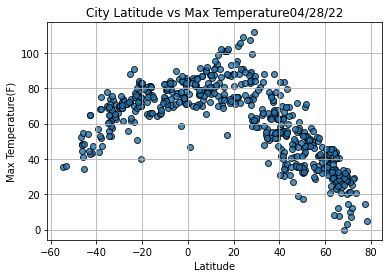

In [14]:
import time
plt.scatter(lats,max_temps,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Max Temperature"+ time.strftime('%x'))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()


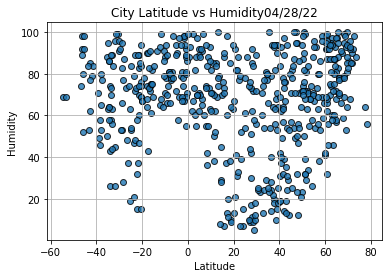

In [15]:
import time
plt.scatter(lats,humidity,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Humidity"+ time.strftime('%x'))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

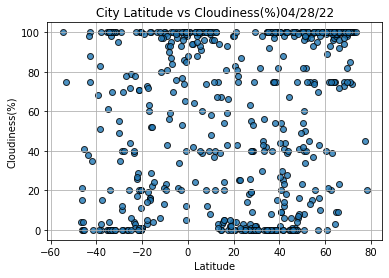

In [16]:
import time
plt.scatter(lats,cloudiness,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Cloudiness(%)"+ time.strftime('%x'))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

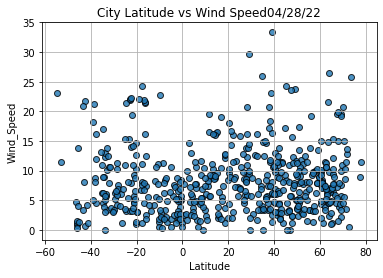

In [17]:
import time
plt.scatter(lats,wind_speed,edgecolor = "black",linewidths = 1,marker="o",alpha = 0.8,label = "Cities")
plt.title(f"City Latitude vs Wind Speed"+ time.strftime('%x'))
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

In [18]:

from scipy.stats import linregress


In [19]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is:{r_value:.3f}")
    plt.show()
    



In [20]:
index13 = city_data_df.loc[13]
index13

City                     Imbituba
Country                        BR
Date          2022-04-28 07:59:07
Lat                        -28.24
Lng                      -48.6703
Max Temp                    73.85
Humidity                       77
Cloudiness                     70
Wind Speed                   7.65
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df['Lat']>=0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Neepawa,CA,2022-04-28 07:59:02,50.2289,-99.4664,34.20,87,100,3.69
2,Lasa,IT,2022-04-28 07:59:03,46.6166,10.7002,50.36,49,1,3.44
3,Torbay,CA,2022-04-28 07:54:06,47.6666,-52.7314,35.28,95,75,2.30
4,Aswan,EG,2022-04-28 07:59:03,24.0934,32.9070,90.70,15,0,5.75
5,Adjumani,UG,2022-04-28 07:59:04,3.3779,31.7909,81.54,55,100,4.72


In [22]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [23]:
southern_hemi_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Mataura,NZ,2022-04-28 07:59:02,-46.1927,168.8643,44.69,98,0,0.89
8,Hithadhoo,MV,2022-04-28 07:59:05,-0.6000,73.0833,84.67,71,98,8.48
9,Avarua,CK,2022-04-28 07:59:05,-21.2078,-159.7750,78.85,89,71,5.75
11,Bengkulu,ID,2022-04-28 07:59:06,-3.8004,102.2655,85.03,69,34,7.56
13,Imbituba,BR,2022-04-28 07:59:07,-28.2400,-48.6703,73.85,77,70,7.65
...,...,...,...,...,...,...,...,...,...
529,Christchurch,NZ,2022-04-28 08:05:08,-43.5333,172.6333,53.94,84,38,3.44
532,Luwuk,ID,2022-04-28 08:05:09,-0.9516,122.7875,82.81,81,100,1.92
542,Touros,BR,2022-04-28 08:05:13,-5.1989,-35.4608,75.52,89,99,10.54
543,Namibe,AO,2022-04-28 08:05:23,-15.1961,12.1522,75.09,69,4,5.59


The r-value is:-0.849


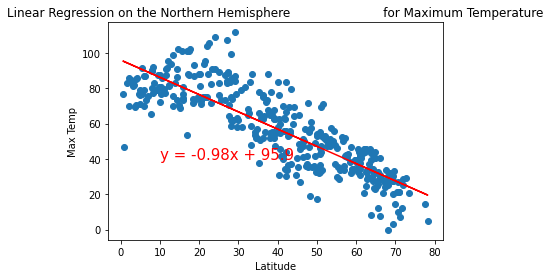

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Maximum Temperature', 'Max Temp',(10,40))

The r-value is:0.697


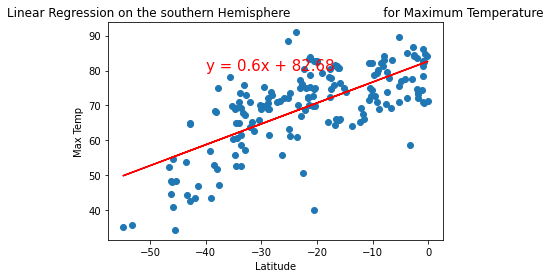

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere\
                        for Maximum Temperature', 'Max Temp',(-40,80))

The r-value is:0.203


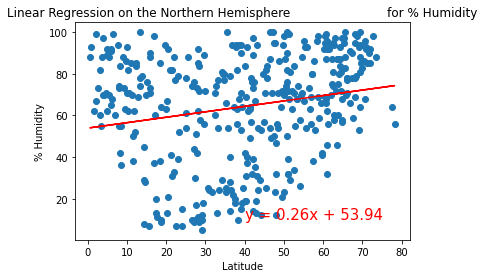

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

The r-value is:0.202


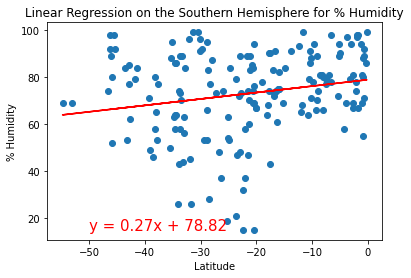

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

The r-value is:0.239


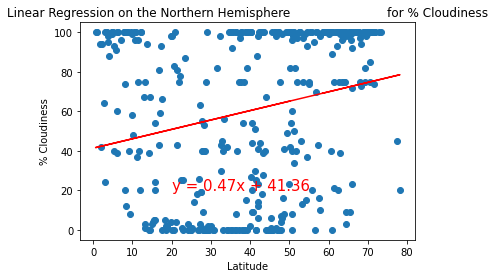

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,20))

The r-value is:0.307


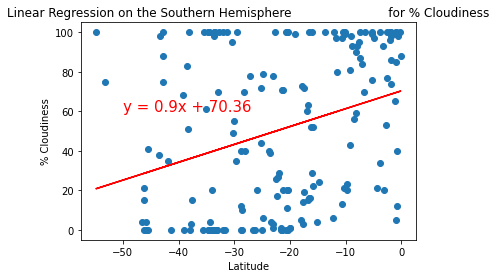

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

The r-value is:0.056


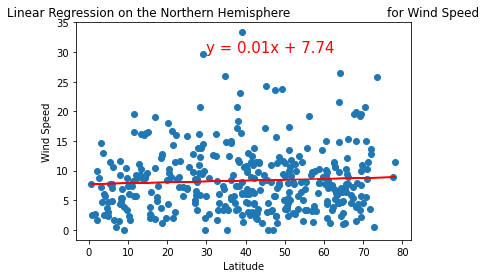

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,30))

The r-value is:-0.201


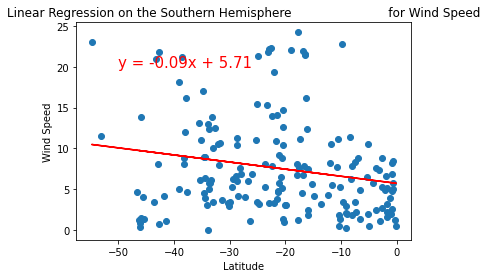

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))
